In [2]:
## load the libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import  stats
import seaborn  as sns
import statistics 
import statsmodels.formula.api as smf

In [3]:
## Load Swiz  dataset
df = pd.read_csv('Data/Swiz_Analysis_Dataset.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,,Country,Year,nuclear_total_supply,renewables_waste_total_supply,nuclear_total_consumption,renewables_waste_total_consumption,coal_peat_oil_shale_total_consumption,crude_NGL_feedstocks_total_consumption,oil_products_total_consumption,coal_peat_oil_shale_total_supply,crude_NGL_feedstocks_total_supply,oil_products_total_supply,fossil_co2_emissions,co2_emission_change,co2_emissions_per_capita,population,pop,share_of_world
0,19,Switzerland,1990,258.737273,169.430656,258.737273,169.430656,14.743573,132.619050,471.261598,15.044667,132.619050,380.483602,44773770,0.0273,6.67,6713173,0.0098,0.0012
1,20,Switzerland,1991,251.306365,183.188334,251.306365,183.188334,12.776179,203.291451,495.860401,12.672389,203.291451,314.604400,47086870,0.0517,6.93,6796943,0.0125,0.0013
2,21,Switzerland,1992,256.766362,185.566701,256.766362,185.566701,8.874856,185.438099,497.367402,8.789069,185.438099,336.342998,47043650,-0.0009,6.84,6875051,0.0115,0.0013
3,22,Switzerland,1993,255.728182,197.383144,255.728182,197.383144,7.451118,206.783649,469.422400,7.318225,206.783649,284.819400,44728730,-0.0492,6.45,6938106,0.0092,0.0012
4,23,Switzerland,1994,266.788180,207.029854,266.788180,207.029854,7.498220,210.632101,457.762401,7.402375,210.632101,287.239400,43795880,-0.0209,6.26,6993587,0.0080,0.0012


In [4]:
df1 = df
df1['RE_Consumption_Volume'] = df1['nuclear_total_supply'] + df1['renewables_waste_total_supply']
df1['RE_Supply_Volume'] = df1['nuclear_total_consumption'] + df1['renewables_waste_total_consumption']
df1['NRE_Consumption_Volume'] = df1['coal_peat_oil_shale_total_consumption'] + df1['crude_NGL_feedstocks_total_consumption'] + df1['oil_products_total_consumption']
df1['NRE_Supply_Volume'] = df1['coal_peat_oil_shale_total_supply'] + df1['crude_NGL_feedstocks_total_supply'] + df1['oil_products_total_supply']
df2 = df1[['Country','Year','RE_Supply_Volume','RE_Consumption_Volume','NRE_Supply_Volume','NRE_Consumption_Volume','fossil_co2_emissions',
          'co2_emission_change','co2_emissions_per_capita','population','pop','share_of_world']]

In [5]:
df2

,Country,Year,RE_Supply_Volume,RE_Consumption_Volume,NRE_Supply_Volume,NRE_Consumption_Volume,fossil_co2_emissions,co2_emission_change,co2_emissions_per_capita,population,pop,share_of_world
0,Switzerland,1990,428.167929,428.167929,528.147319,618.624222,44773770,0.0273,6.67,6713173,0.0098,0.0012
1,Switzerland,1991,434.494699,434.494699,530.568240,711.928031,47086870,0.0517,6.93,6796943,0.0125,0.0013
2,Switzerland,1992,442.333063,442.333063,530.570166,691.680357,47043650,-0.0009,6.84,6875051,0.0115,0.0013
3,Switzerland,1993,453.111326,453.111326,498.921274,683.657167,44728730,-0.0492,6.45,6938106,0.0092,0.0012
4,Switzerland,1994,473.818033,473.818033,505.273876,675.892721,43795880,-0.0209,6.26,6993587,0.0080,0.0012
5,Switzerland,1995,466.222332,466.222332,471.953505,673.705604,44582820,0.0180,6.33,7040477,0.0067,0.0012
6,Switzerland,1996,450.407734,450.407734,477.909726,703.948727,45133730,0.0124,6.38,7071883,0.0045,0.0012
7,Switzerland,1997,468.356198,468.356198,502.591728,680.793124,43847960,-0.0285,6.19,7089163,0.0024,0.0012
8,Switzerland,1998,473.961636,473.961636,503.680870,697.832273,45308770,0.0333,6.37,7110291,0.0030,0.0012
9,Switzerland,1999,501.481460,501.481460,489.722405,705.726405,45575150,0.0059,6.38,7144121,0.0048,0.0013


In [14]:
## Check the correlation between data 


df_correlation = df2[['Year','NRE_Consumption_Volume','RE_Consumption_Volume','fossil_co2_emissions','population']]
df_correlation.head()

,Year,NRE_Consumption_Volume,RE_Consumption_Volume,fossil_co2_emissions,population
0,1990,618.624222,428.167929,44773770,6713173
1,1991,711.928031,434.494699,47086870,6796943
2,1992,691.680357,442.333063,47043650,6875051
3,1993,683.657167,453.111326,44728730,6938106
4,1994,675.892721,473.818033,43795880,6993587


In [16]:
df_correlation.corr().T

,Year,NRE_Consumption_Volume,RE_Consumption_Volume,fossil_co2_emissions,population
Year,1.000000,-0.824090,0.673726,-0.771371,0.986792
NRE_Consumption_Volume,-0.824090,1.000000,-0.315880,0.953372,-0.890034
RE_Consumption_Volume,0.673726,-0.315880,1.000000,-0.333747,0.599814
fossil_co2_emissions,-0.771371,0.953372,-0.333747,1.000000,-0.844451
population,0.986792,-0.890034,0.599814,-0.844451,1.000000


Correlation Matrix Interpretation
Year:
Strong positive correlation with population (0.987): As the year progresses, the population tends to increase.
Strong negative correlation with NRE_Consumption_Volume (-0.824): Suggests that as time progresses, reliance on non-renewable energy consumption decreases.
Moderate positive correlation with RE_Consumption_Volume (0.674): Indicates that as the years advance, renewable energy consumption tends to increase.
Strong negative correlation with fossil_co2_emissions (-0.771): Implies that over time, fossil CO2 emissions are decreasing, possibly due to better regulations or shifts to renewable sources.
NRE_Consumption_Volume:

Strong negative correlation with fossil_co2_emissions (0.953): As non-renewable consumption increases, fossil CO2 emissions also increase significantly.
Strong positive correlation with population (-0.890): Indicates that higher populations may lead to reduced non-renewable consumption, potentially due to a shift towards renewables.
RE_Consumption_Volume:

Moderate negative correlation with fossil_co2_emissions (-0.334): Suggests a slight trend where higher renewable energy consumption correlates with lower fossil CO2 emissions.
Positive correlation with population (0.600): Indicates that as the population grows, renewable energy consumption also tends to rise.
fossil_co2_emissions:

Strong negative correlation with population (-0.844): Suggests that higher populations may be associated with lower fossil emissions, possibly due to advancements in clean technologies or policies.
population:

Overall, population appears to have significant correlations with both renewable and non-renewable energy consumption and emissions, suggesting it’s a key factor in understanding energy dynamics.

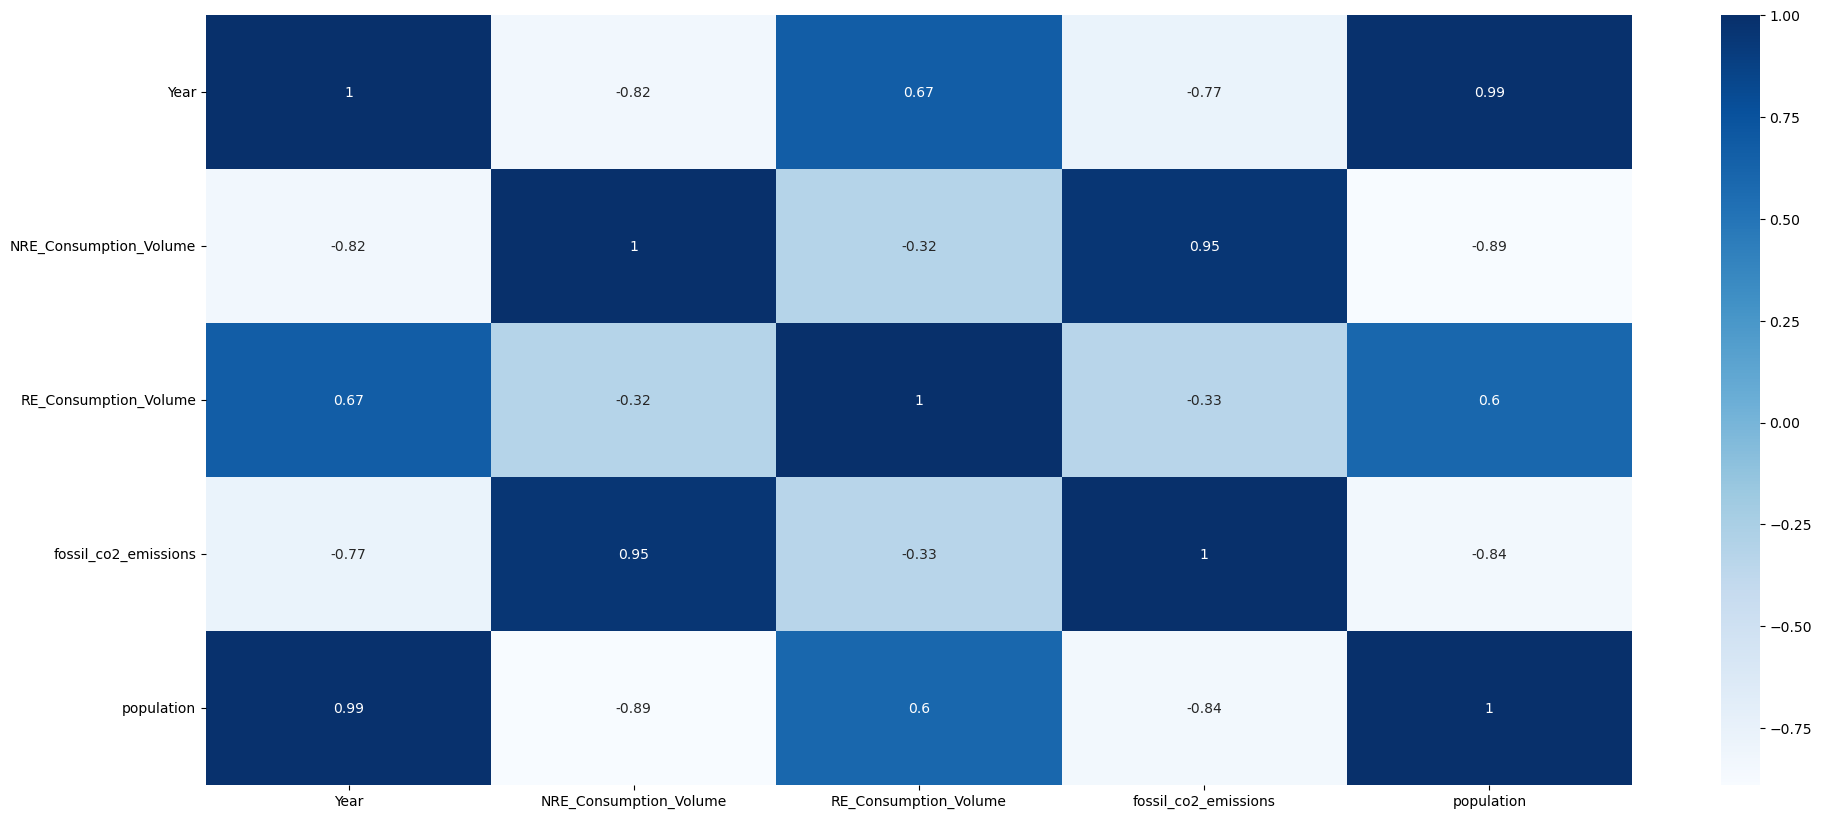

In [24]:
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), cmap='Blues',annot = True)
plt.show()
#plt.savefig('Data/heatmap_swiz.jpg') 

plt.savefig('Data/heatmap_swiz.png', dpi=300)  # Save with high resolution
plt.close()

## Correlation between NRE vs CO2

In [27]:
df_correlation_1 = df2[['NRE_Consumption_Volume','fossil_co2_emissions']]
df_correlation_1.head()
df_correlation_1.corr().T

,NRE_Consumption_Volume,fossil_co2_emissions
NRE_Consumption_Volume,1.000000,0.953372
fossil_co2_emissions,0.953372,1.000000


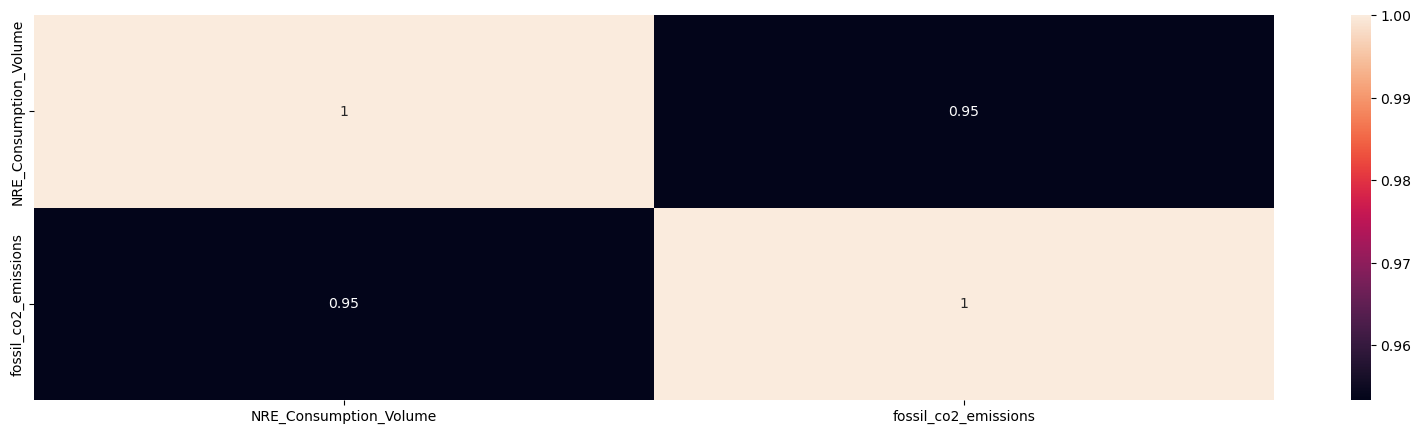

In [39]:
plt.figure(figsize = (20,5))
sns.heatmap(df_correlation_1.corr(), annot = True)
plt.show()

## Correlation between NRE vs CO2

In [44]:
df_correlation_2 = df2[['RE_Consumption_Volume','fossil_co2_emissions']]
df_correlation_2.head()
df_correlation_2.corr().T

,RE_Consumption_Volume,fossil_co2_emissions
RE_Consumption_Volume,1.000000,-0.333747
fossil_co2_emissions,-0.333747,1.000000


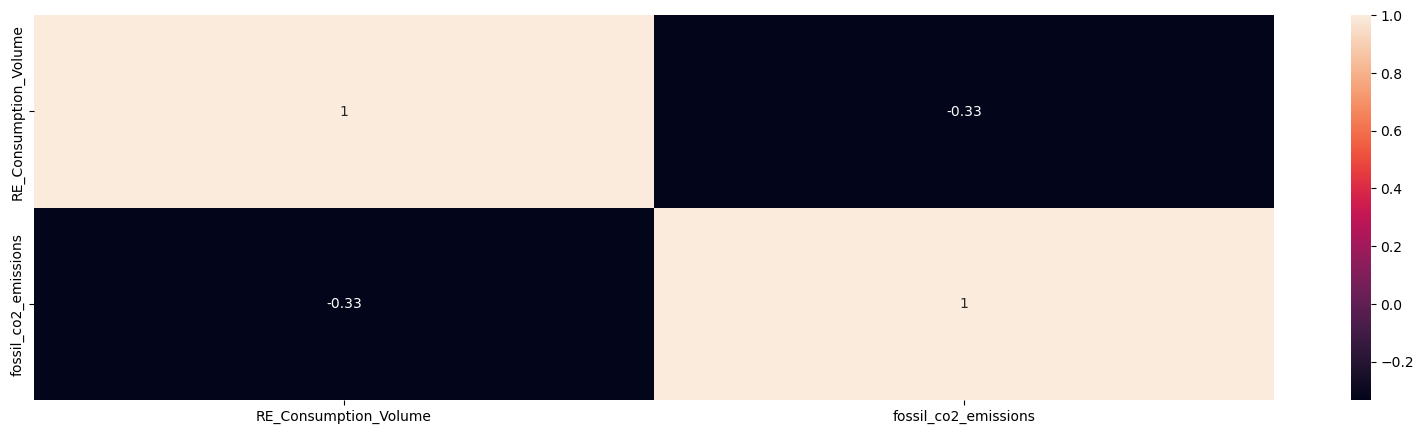

In [46]:
plt.figure(figsize = (20,5))
sns.heatmap(df_correlation_2.corr(), annot = True)
plt.show()

## Outliers

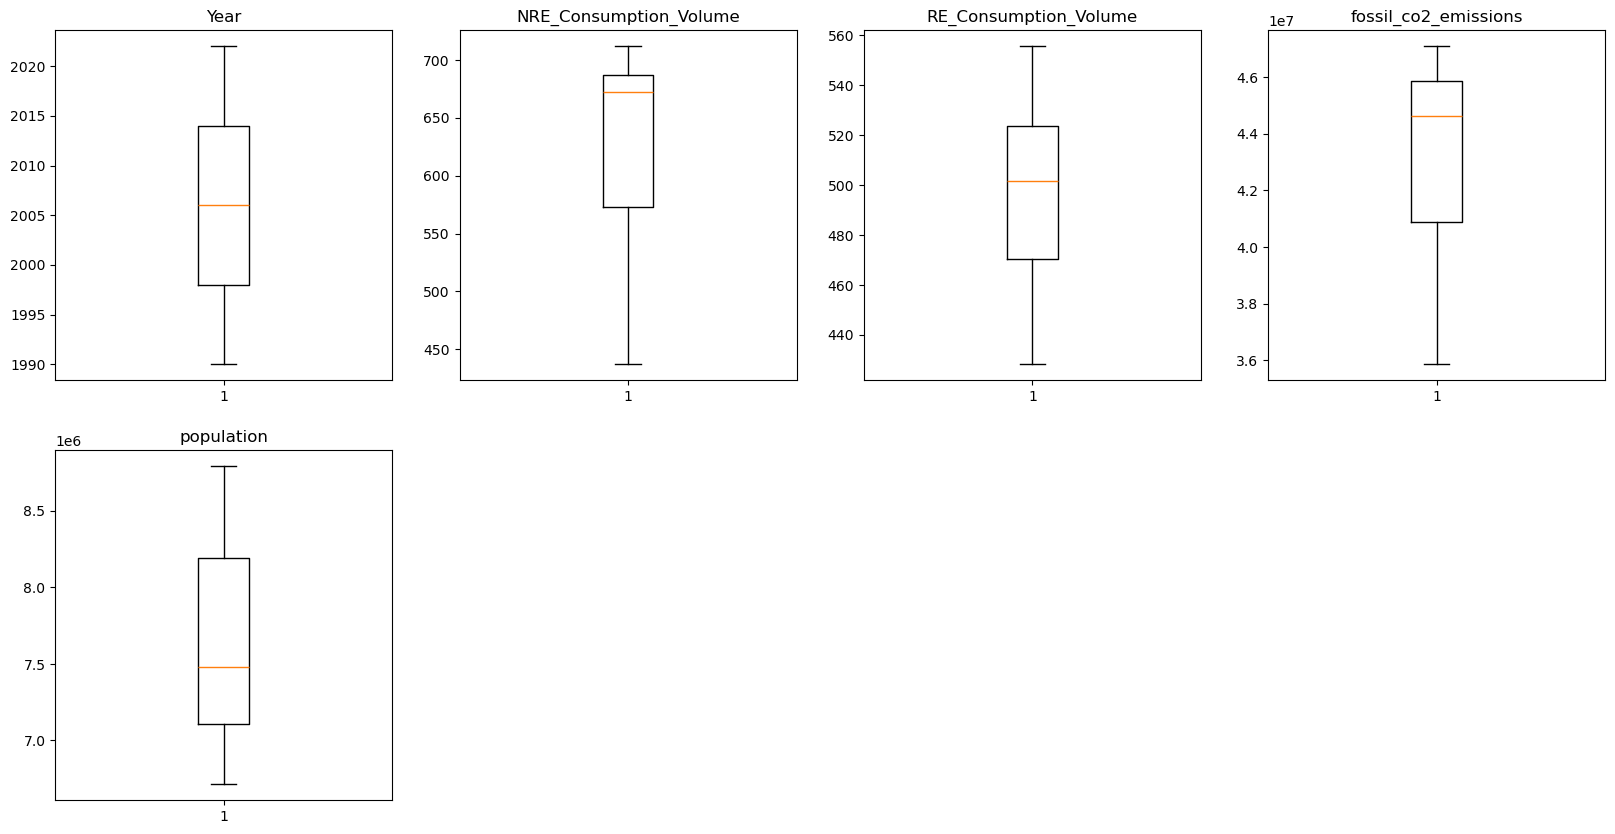

In [48]:
plt.figure(figsize = (20,10))
for i in enumerate(df_correlation):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [50]:
z = np.abs(stats.zscore(df_correlation))
#removing the outliers
df_new = df_correlation[(z < 1.9).all(axis=1)]

In [52]:
df_new.reset_index(drop=True, inplace=True)
df_new.head()

,Year,NRE_Consumption_Volume,RE_Consumption_Volume,fossil_co2_emissions,population
0,1991,711.928031,434.494699,47086870,6796943
1,1992,691.680357,442.333063,47043650,6875051
2,1993,683.657167,453.111326,44728730,6938106
3,1994,675.892721,473.818033,43795880,6993587
4,1995,673.705604,466.222332,44582820,7040477


In [54]:
print("The length of the original : " , len(df2))
print("The length after removing the outliers : " , len(df_new))
print("We just Removed",len(df2)-len(df_new),"Outliers")

The length of the original :  33
The length after removing the outliers :  29
We just Removed 4 Outliers


## Model Building

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## Linear Regression

R²: 0.8971299461270197, MAE: 622557.4273631655


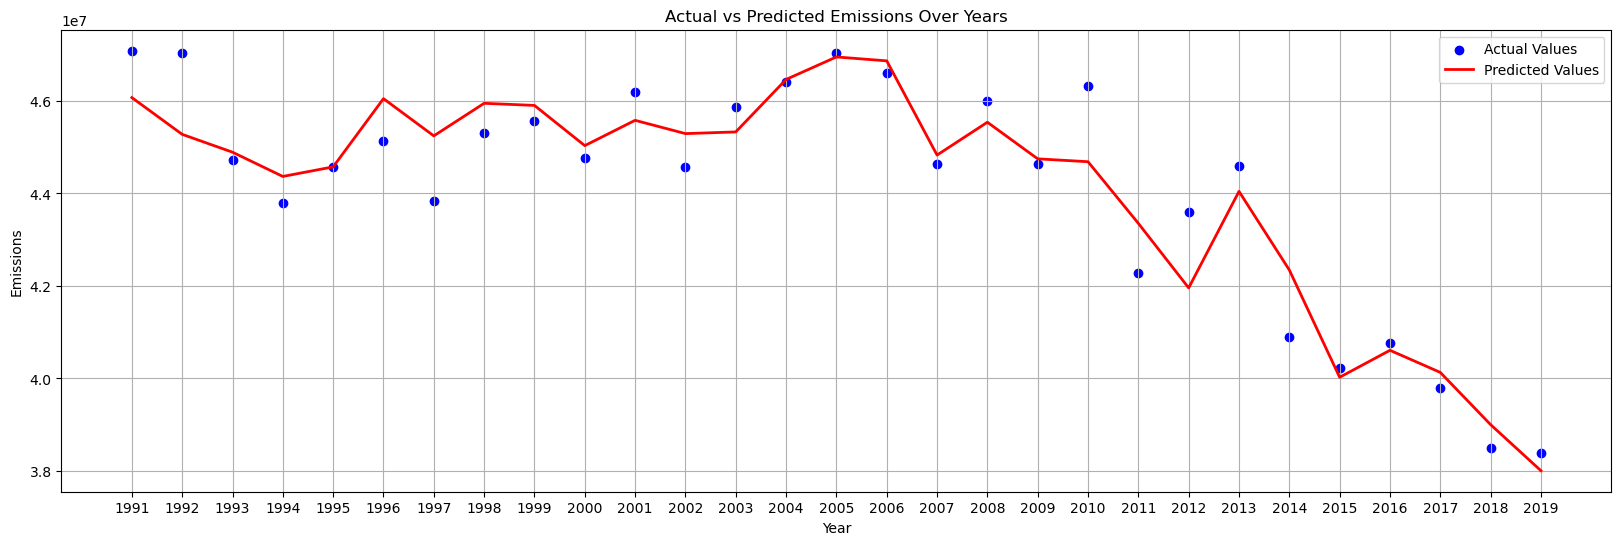

In [92]:
# Prepare the features and target variable
X = df_new[['RE_Consumption_Volume','Year','population','NRE_Consumption_Volume']]
y = df_new['fossil_co2_emissions']

# Fit the linear regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Make predictions for the entire dataset
y_pred = model.predict(X)


# # Evaluate performance
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f"R²: {r2}, MAE: {mae}")

# Plotting
plt.figure(figsize=(20, 6))

# Scatter plot of actual values
plt.scatter(df_new['Year'], df_new['fossil_co2_emissions'], color='blue', label='Actual Values', marker='o')

# Line plot of predicted values
# Ensure that the x-axis uses the Year for plotting
plt.plot(df_new['Year'], y_pred, color='red', label='Predicted Values', linewidth=2)

# Adding titles and labels
plt.title('Actual vs Predicted Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(df_new['Year'])  # Set x-ticks to be the years
plt.legend()
plt.grid()

# Show the plot
plt.show()

 0     1.013393e+06
1     1.764929e+06
2    -1.640797e+05
3    -5.726476e+05
4     6.957594e+03
5    -9.171194e+05
6    -1.397843e+06
7    -6.410240e+05
8    -3.292112e+05
9    -2.645651e+05
10    6.137142e+05
11   -7.230665e+05
12    5.321108e+05
13   -5.928649e+04
14    8.763426e+04
15   -2.596020e+05
16   -2.034509e+05
17    4.576903e+05
18   -1.142196e+05
19    1.627963e+06
20   -1.075010e+06
21    1.632832e+06
22    5.555166e+05
23   -1.451538e+06
24    1.914460e+05
25    1.650039e+05
26   -3.395135e+05
27   -5.149063e+05
28    3.778912e+05
Name: fossil_co2_emissions, dtype: float64
 [46073476.50704074 45278721.11490583 44892809.67876673 44368527.63358665
 44575862.405792   46050849.40436554 45245802.52480531 45949794.01203942
 45904361.21743703 45034775.0508126  45581985.82076645 45294886.48158503
 45331099.18040371 46465586.49362314 46952365.7437762  46867862.03191566
 44830830.86392033 45540829.73935664 44749399.60635042 44686956.54545748
 43354309.94373071 41958647.89816487 44

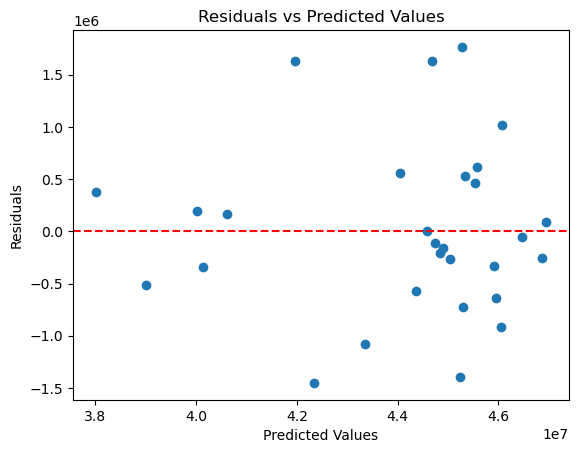

In [96]:
residuals = y - y_pred
print("",residuals)
print("",y_pred)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Random Forest

In [144]:
X = df_new[['RE_Consumption_Volume','Year','population','NRE_Consumption_Volume']]
#X = df_new[['NRE_Consumption_Volume','RE_Consumption_Volume']]
y = df_new['fossil_co2_emissions']

from sklearn.preprocessing import PolynomialFeatures
# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Make predictions
y_pred_rf = rf_model.predict(X)

# Evaluate performance
r2_rf = r2_score(y, y_pred_rf)
mae_rf = mean_absolute_error(y, y_pred_rf)
mse_rf = mean_squared_error(y, y_pred_rf)


print(f"Random Forest R²: {r2_rf}, MAE: {mae_rf}, MSE: {mse_rf}")

Random Forest R²: 0.97703479627424, MAE: 328842.5448275861, MSE: 145347785265.72614


## P-Value

In [148]:

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     fossil_co2_emissions   R-squared:                       0.897
Model:                              OLS   Adj. R-squared:                  0.880
Method:                   Least Squares   F-statistic:                     52.33
Date:                  Sun, 27 Oct 2024   Prob (F-statistic):           1.65e-11
Time:                          16:40:35   Log-Likelihood:                -435.58
No. Observations:                    29   AIC:                             881.2
Df Residuals:                        24   BIC:                             888.0
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

R²: 0.977: This means that approximately 97.7% of the variance in emissions is explained by your model, which is an excellent fit. The model captures almost all of the variability in the target variable.

MAE: 328,842.54: The mean absolute error has improved, indicating that the average difference between the actual and predicted emissions is relatively low.

MSE: 145,347,785,265.73: The mean squared error is also lower, suggesting that the discrepancies between predicted and actual values are minor compared to previous models.

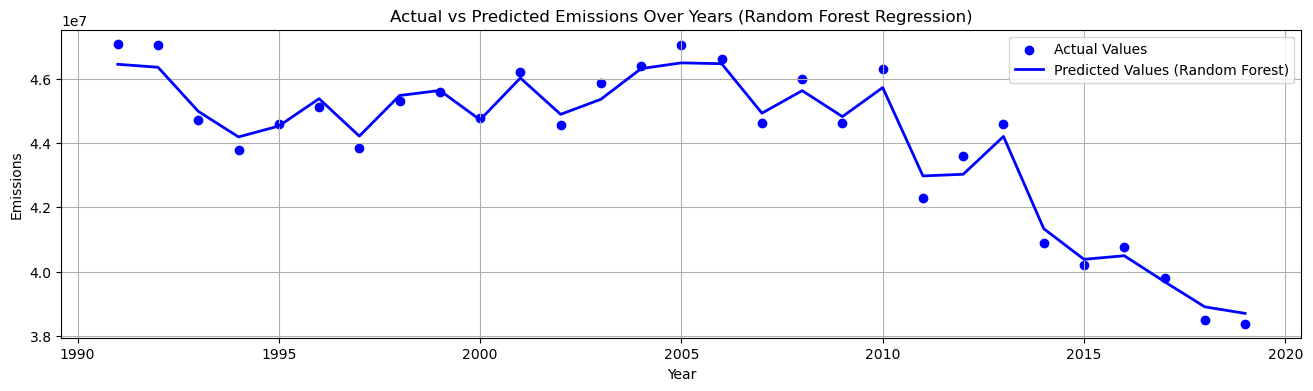

In [135]:
# Plotting
plt.figure(figsize=(16, 4))
plt.scatter(df_new['Year'], y, color='blue', label='Actual Values', marker='o')
plt.plot(df_new['Year'], y_pred_rf, color='blue', label='Predicted Values (Random Forest)', linewidth=2)
plt.title('Actual vs Predicted Emissions Over Years (Random Forest Regression)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid()
plt.show()

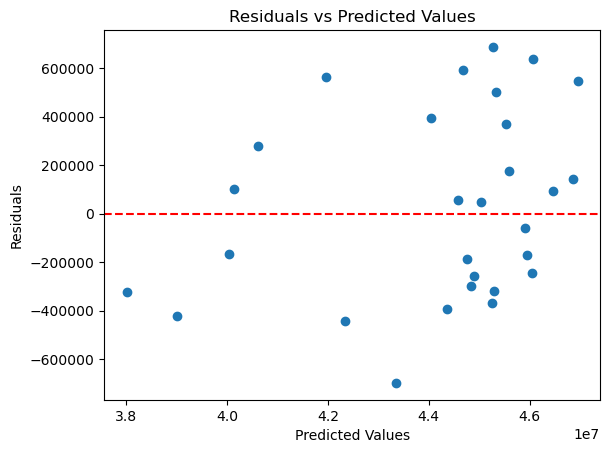

In [137]:
residuals = y - y_pred_rf
#print("",residuals)
# print("",y_pred)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Testing out the residula plots for outliers


In [142]:
# import matplotlib.pyplot as plt

# residuals = [639430.8, 688036.6, -255453.7, -394017.3, 54298.6, -244399.1,
#              -366972.3, -168736.4, -58290.6, 48982.3, 174121.9, -319779.3,
#              503377.3, 92365.7, 548608.4, 142393.8, -300592.0, 369997.0,
#              -186177.0, 590768.4, -698588.2, 562629.6, 395920.2, -443393.5,
#              -167328.5, 277518.8, 101378.1, -420805.7, -322072.7]

# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(residuals)), residuals)
# plt.axhline(0, color='red', linestyle='--')
# plt.title('Residuals Plot')
# plt.xlabel('Index')
# plt.ylabel('Residuals')
# plt.show()

In [70]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                  Feature  Importance
3  NRE_Consumption_Volume    0.434093
1                    Year    0.289584
2              population    0.254312
0   RE_Consumption_Volume    0.022011


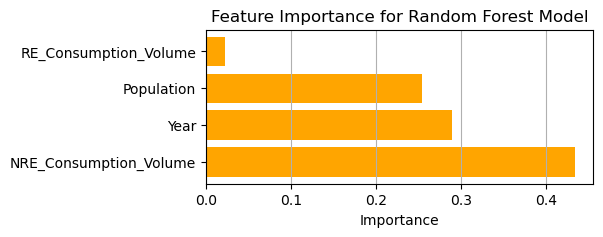

In [78]:
# Sample feature importance data
importance_data = {
    'Feature': ['NRE_Consumption_Volume', 'Year', 'Population', 'RE_Consumption_Volume'],
    'Importance': [0.434093, 0.289584, 0.254312, 0.022011]
}

importance_df = pd.DataFrame(importance_data)

# Plotting
plt.figure(figsize=(5, 2))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest Model')
plt.grid(axis='x')
plt.show()

NRE_Consumption_Volume (0.434): This feature is the most important in your model, accounting for approximately 43.4% of the model's predictive power. This suggests that variations in non-renewable energy consumption significantly influence emissions.

Year (0.290): The year also plays a substantial role, contributing about 29.0% to the predictions. This may indicate trends over time, such as regulatory changes, technological advancements, or shifts in consumption patterns.

Population (0.254): Population contributes approximately 25.4%. This suggests that as population increases, emissions may also rise, reflecting higher demand for energy and resources.

RE_Consumption_Volume (0.022): This feature has the lowest importance, at only 2.2%. It seems to have a minor impact on emissions, which could suggest that renewable energy consumption alone doesn't significantly influence the total emissions in your dataset.

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression 

In [82]:
# Example: Generating synthetic data (replace this with your actual data)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)

In [84]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [86]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert negative scores to positive
mae_scores = -scores

# Print the results
print("Mean Absolute Error for each fold:", mae_scores)
print("Average MAE across all folds:", mae_scores.mean())

Mean Absolute Error for each fold: [52.3224553  54.19265861 58.28638796 57.48274091 57.61477803]
Average MAE across all folds: 55.97980416327856


## Remove less important features

In [151]:
X = df_new[['NRE_Consumption_Volume']]
y = df_new['RE_Consumption_Volume']

from sklearn.preprocessing import PolynomialFeatures
# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Make predictions
y_pred_rf = rf_model.predict(X)

# Evaluate performance
r2_rf = r2_score(y, y_pred_rf)
mae_rf = mean_absolute_error(y, y_pred_rf)
mse_rf = mean_squared_error(y, y_pred_rf)


print(f"Random Forest R²: {r2_rf}, MAE: {mae_rf}, MSE: {mse_rf}")

Random Forest R²: 0.838771828357398, MAE: 10.92258342127598, MSE: 166.69777317877572


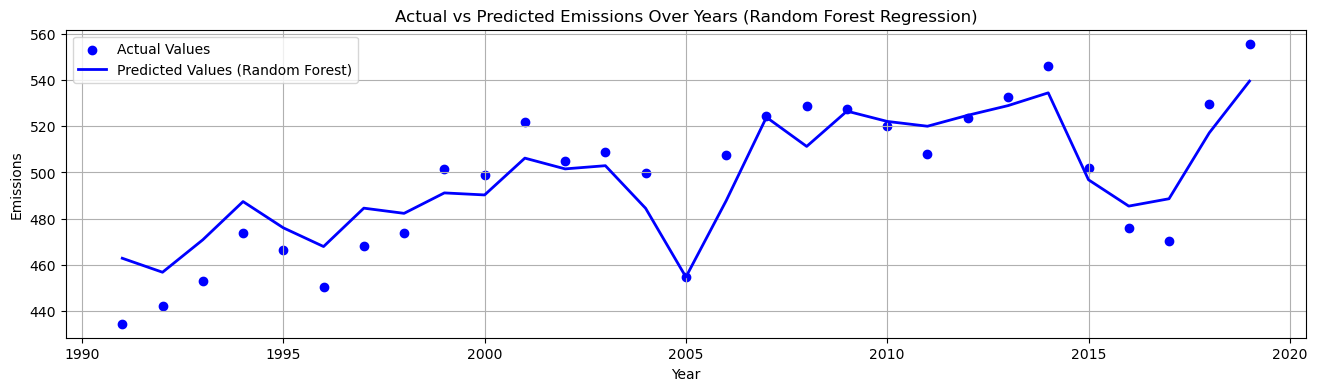

In [153]:
# Plotting
plt.figure(figsize=(16, 4))
plt.scatter(df_new['Year'], y, color='blue', label='Actual Values', marker='o')
plt.plot(df_new['Year'], y_pred_rf, color='blue', label='Predicted Values (Random Forest)', linewidth=2)
plt.title('Actual vs Predicted Emissions Over Years (Random Forest Regression)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid()
plt.show()

In [155]:
import statsmodels.api as sm
# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     RE_Consumption_Volume   R-squared:                       0.135
Model:                               OLS   Adj. R-squared:                  0.103
Method:                    Least Squares   F-statistic:                     4.228
Date:                   Sun, 27 Oct 2024   Prob (F-statistic):             0.0495
Time:                           16:44:16   Log-Likelihood:                -139.69
No. Observations:                     29   AIC:                             283.4
Df Residuals:                         27   BIC:                             286.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

A low p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that you can reject the null hypothesis.
A high p-value (> 0.05) suggests weak evidence against the null hypothesis, meaning you fail to reject it.